In [20]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [21]:
# Load dataset
d = pd.read_csv("data.csv")
heart_data = pd.DataFrame(d)
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [22]:
X = heart_data.drop(columns=['HeartDisease']) 
y = heart_data['HeartDisease'] 

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# Initialize logistic regression model
model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Store the losses over iterations
losses = []

# Fit the model and store the loss after each iteration
for i in range(1, 100, 10):  # 100 iterations with steps of 10
    model.max_iter = i
    model.fit(X_train, y_train)
    loss = log_loss(y_val, model.predict_proba(X_val))
    losses.append(loss)

C:\Users\Hasan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hasan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [27]:
# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8532608695652174


In [28]:
from sklearn.metrics import log_loss

# Predict probabilities on the test data
y_pred_proba = model.predict_proba(X_test)

# Compute log loss
logloss = log_loss(y_test, y_pred_proba)
print("Log Loss:", logloss)

Log Loss: 0.35171270466147614


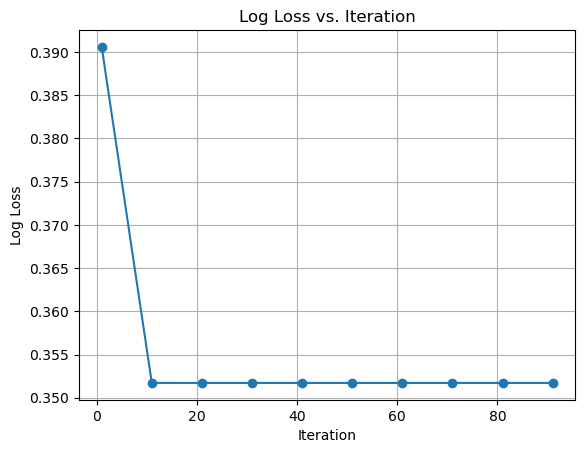

In [29]:
# Plot the loss over iterations
plt.plot(range(1, 101, 10), losses, marker='o', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Log Loss vs. Iteration')
plt.grid(True)
plt.show()